In [6]:
raw_data= open('6.txt', encoding='utf8').read()
raw_data

" Home\nRecipes\nBy Category\n\nmains\n\nbeef\nchicken\nfish\npork\nturkey\n\n\nappetizers\nbreakfasts\ncasseroles\ncocktails\ncrockpot\ndesserts\n\nbars\nbrownies and bars\ncakes\ncandies\ncookies\ncobblers and crumbles\ncupcakes\npies and tarts\n\n\nside dishes\nsoups and stews\npasta\n\n\nFree Membership\nsearch...  Home\nRecipes\nBy Category\n\nmains\n\nbeef\nchicken\nfish\npork\nturkey\n\n\nappetizers\nbreakfasts\ncasseroles\ncocktails\ncrockpot\ndesserts\n\nbars\nbrownies and bars\ncakes\ncandies\ncookies\ncobblers and crumbles\ncupcakes\npies and tarts\n\n\nside dishes\nsoups and stews\npasta\n\n\nFree Membership\nsearch... \n\n\n\nItalian Wedding Cookies December 17, 2022 By Kathleen | 22 Comments  Italian Wedding Cookies dust your dessert trays with confectioner’s sugar wonder! You only need 6 ingredients to make these cookies.\n\nJUMP TO RECIPE \n\n \n\n\nItalian Wedding Cookies December 17, 2022 By Kathleen | 22 Comments  Italian Wedding Cookies dust your dessert trays with 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix

In [8]:
data=pd.Series(raw_data)

In [9]:
data

0     Home\nRecipes\nBy Category\n\nmains\n\nbeef\n...
dtype: object

In [10]:
data_processed= data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())
data_processed

0     home recipes by category mains beef chicken f...
dtype: object

In [11]:
stop_words= stopwords.words('english')

In [12]:
from nltk import word_tokenize

In [13]:
data_final = data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)>2]))

In [14]:
data_final

0    home recipes category mains beef chicken fish ...
dtype: object

In [15]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common()


[('cookies', 179),
 ('recipe', 91),
 ('reply', 91),
 ('sugar', 72),
 ('says', 66),
 ('kathleen', 55),
 ('flour', 55),
 ('december', 52),
 ('italian', 50),
 ('butter', 46),
 ('make', 44),
 ('time', 39),
 ('almond', 37),
 ('almonds', 36),
 ('ground', 35),
 ('wedding', 34),
 ('use', 32),
 ('vanilla', 31),
 ('confectioners', 30),
 ('cups', 28),
 ('extract', 27),
 ('cool', 24),
 ('ingredients', 23),
 ('love', 23),
 ('purpose', 23),
 ('want', 23),
 ('well', 22),
 ('recipes', 21),
 ('confectioner', 21),
 ('christmas', 21),
 ('cookie', 21),
 ('dough', 20),
 ('pecans', 20),
 ('yes', 19),
 ('minutes', 19),
 ('gon', 19),
 ('seconds', 19),
 ('dust', 18),
 ('advertising', 18),
 ('freeze', 17),
 ('mix', 16),
 ('roll', 16),
 ('place', 16),
 ('powdered', 15),
 ('bake', 15),
 ('baking', 15),
 ('salt', 15),
 ('without', 14),
 ('best', 14),
 ('ahead', 14),
 ('bianca', 14),
 ('trays', 13),
 ('affiliate', 13),
 ('family', 12),
 ('made', 12),
 ('also', 12),
 ('like', 12),
 ('mixing', 12),
 ('bowl', 12),
 ('

In [16]:
words_list

['home',
 'recipes',
 'category',
 'mains',
 'beef',
 'chicken',
 'fish',
 'pork',
 'turkey',
 'appetizers',
 'breakfasts',
 'casseroles',
 'cocktails',
 'crockpot',
 'desserts',
 'bars',
 'brownies',
 'bars',
 'cakes',
 'candies',
 'cookies',
 'cobblers',
 'crumbles',
 'cupcakes',
 'pies',
 'tarts',
 'side',
 'dishes',
 'soups',
 'stews',
 'pasta',
 'free',
 'membership',
 'search',
 'home',
 'recipes',
 'category',
 'mains',
 'beef',
 'chicken',
 'fish',
 'pork',
 'turkey',
 'appetizers',
 'breakfasts',
 'casseroles',
 'cocktails',
 'crockpot',
 'desserts',
 'bars',
 'brownies',
 'bars',
 'cakes',
 'candies',
 'cookies',
 'cobblers',
 'crumbles',
 'cupcakes',
 'pies',
 'tarts',
 'side',
 'dishes',
 'soups',
 'stews',
 'pasta',
 'free',
 'membership',
 'search',
 'italian',
 'wedding',
 'cookies',
 'december',
 'kathleen',
 'comments',
 'italian',
 'wedding',
 'cookies',
 'dust',
 'dessert',
 'trays',
 'confectioner',
 'sugar',
 'wonder',
 'need',
 'ingredients',
 'make',
 'cookies',


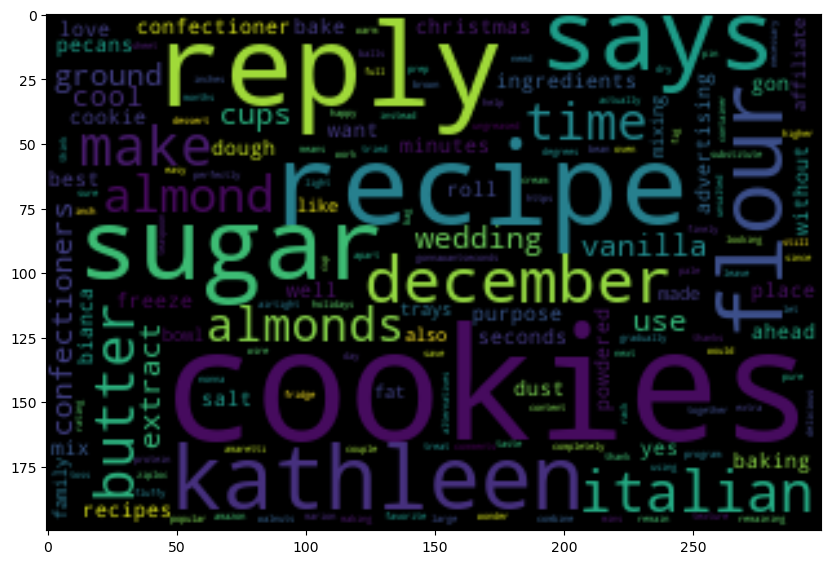

In [17]:
from wordcloud import WordCloud
import wordcloud

wcloud_fig = WordCloud( stopwords = set(wordcloud.STOPWORDS), colormap = 'viridis', width = 300 , height = 200).generate_from_frequencies(freq_dist)

#plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation = 'bilinear')
plt.show()

In [18]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

In [19]:
words_sent = [x.split() for x in data_final]
words_sent
bigram= Phrases(words_sent, min_count=5, threshold=100)
trigram= Phrases(bigram[words_sent], threshold=100)

bigram_phraser= Phraser(bigram)
trigram_phraser= Phraser(trigram)

#bag of words for creating bigram and trigram

bow=[trigram_phraser[bigram_phraser[word]] for word in words_sent]

In [20]:
bow[0:1]

[['home',
  'recipes',
  'category',
  'mains',
  'beef',
  'chicken',
  'fish',
  'pork',
  'turkey',
  'appetizers',
  'breakfasts',
  'casseroles',
  'cocktails',
  'crockpot',
  'desserts',
  'bars',
  'brownies',
  'bars',
  'cakes',
  'candies',
  'cookies',
  'cobblers',
  'crumbles',
  'cupcakes',
  'pies',
  'tarts',
  'side',
  'dishes',
  'soups',
  'stews',
  'pasta',
  'free',
  'membership',
  'search',
  'home',
  'recipes',
  'category',
  'mains',
  'beef',
  'chicken',
  'fish',
  'pork',
  'turkey',
  'appetizers',
  'breakfasts',
  'casseroles',
  'cocktails',
  'crockpot',
  'desserts',
  'bars',
  'brownies',
  'bars',
  'cakes',
  'candies',
  'cookies',
  'cobblers',
  'crumbles',
  'cupcakes',
  'pies',
  'tarts',
  'side',
  'dishes',
  'soups',
  'stews',
  'pasta',
  'free',
  'membership',
  'search',
  'italian',
  'wedding',
  'cookies',
  'december',
  'kathleen',
  'comments',
  'italian',
  'wedding',
  'cookies',
  'dust',
  'dessert',
  'trays',
  'c

In [21]:
import spacy
nlp= spacy.load('en_core_web_sm', disable=['parser','ner'])

In [22]:
doc= nlp(' '.join(bow[0]))
for token in doc:
    print(token, '=>', token.pos_)

home => NOUN
recipes => NOUN
category => NOUN
mains => NOUN
beef => NOUN
chicken => PROPN
fish => PROPN
pork => NOUN
turkey => NOUN
appetizers => NOUN
breakfasts => NOUN
casseroles => VERB
cocktails => NOUN
crockpot => NOUN
desserts => NOUN
bars => NOUN
brownies => VERB
bars => NOUN
cakes => NOUN
candies => NOUN
cookies => NOUN
cobblers => VERB
crumbles => VERB
cupcakes => NOUN
pies => NOUN
tarts => VERB
side => NOUN
dishes => NOUN
soups => NOUN
stews => PROPN
pasta => PROPN
free => ADJ
membership => NOUN
search => NOUN
home => NOUN
recipes => NOUN
category => NOUN
mains => NOUN
beef => NOUN
chicken => PROPN
fish => PROPN
pork => NOUN
turkey => NOUN
appetizers => NOUN
breakfasts => NOUN
casseroles => VERB
cocktails => NOUN
crockpot => NOUN
desserts => NOUN
bars => NOUN
brownies => VERB
bars => NOUN
cakes => NOUN
candies => NOUN
cookies => NOUN
cobblers => VERB
crumbles => VERB
cupcakes => NOUN
pies => NOUN
tarts => VERB
side => NOUN
dishes => NOUN
soups => NOUN
stews => PROPN
pasta => 

In [23]:
#now lemmatizing the whole corpus so that we can reach to the  root words

def lemmatization(texts, tags=['NOUN','ADJ','VERB','ADV','PROPN']):
    texts_out= []
    for sent in texts:
        doc= nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [24]:
bag_of_words = lemmatization(bow)

In [25]:
#this gives us the keywords
bag_of_words

[['home',
  'recipe',
  'category',
  'main',
  'beef',
  'chicken',
  'fish',
  'pork',
  'turkey',
  'appetizer',
  'breakfast',
  'casseroles',
  'cocktail',
  'crockpot',
  'dessert',
  'bar',
  'brownie',
  'bar',
  'cake',
  'candy',
  'cookie',
  'cobbler',
  'crumble',
  'cupcake',
  'pie',
  'tart',
  'side',
  'dish',
  'soup',
  'stews',
  'pasta',
  'free',
  'membership',
  'search',
  'home',
  'recipe',
  'category',
  'main',
  'beef',
  'chicken',
  'fish',
  'pork',
  'turkey',
  'appetizer',
  'breakfast',
  'casseroles',
  'cocktail',
  'crockpot',
  'dessert',
  'bar',
  'brownie',
  'bar',
  'cake',
  'candy',
  'cookie',
  'cobbler',
  'crumble',
  'cupcake',
  'pie',
  'tart',
  'side',
  'dish',
  'soup',
  'stews',
  'pasta',
  'free',
  'membership',
  'search',
  'italian',
  'wedding',
  'cookie',
  'december',
  'kathleen',
  'comment',
  'italian',
  'wedding',
  'cookie',
  'dust',
  'dessert',
  'tray',
  'confectioner',
  'sugar',
  'wonder',
  'need',

In [26]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)

Dictionary(444 unique tokens: ['//www', 'able', 'absolute', 'actually', 'address']...)
